[[0.        0.       ]
 [0.5       0.       ]
 [0.75      0.       ]
 [0.875     0.       ]
 [0.9375    0.       ]
 [0.96875   0.       ]
 [0.984375  0.       ]
 [0.984375  0.5      ]
 [0.984375  0.75     ]
 [0.984375  0.875    ]
 [0.984375  0.9375   ]
 [0.984375  0.96875  ]
 [0.984375  0.984375 ]
 [0.9921875 0.984375 ]
 [0.9921875 0.9921875]
 [0.5       0.5      ]]
[0.       0.5      0.75     0.875    0.9375   0.96875  0.       0.5
 0.75     0.875    0.9375   0.96875  0.984375 0.984375 1.984375]


Text(0, 0.5, 'r')

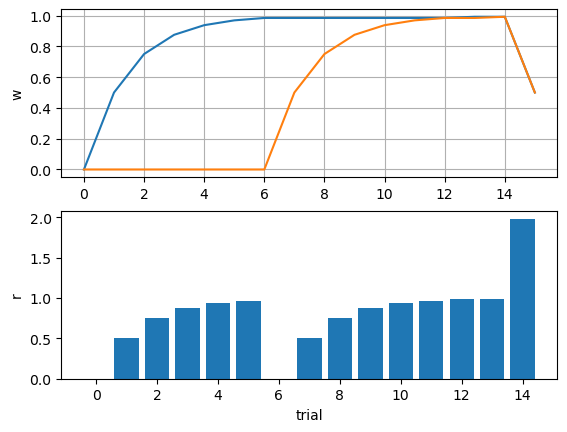

In [1]:
import numpy as np
import matplotlib.pyplot as plt

I = [[1,0]] * 6 + [[0,1]] * 6 + [[1,0]] + [[0,1]] + [[1,1]] #CS
R = [[1.0]] * 15 #US
T = 15
K=2

Z = np.array([[1,0]] * 6 + [[0,1]] * 6 + [[1,0]] + [[0,1]] + [[1,1]]) #latent cause

eta = 0.5


W = np.zeros((T+1,K),dtype='float')
r = np.zeros(T,dtype='float')

for t in range (T):

    r_hat = Z[t] @ W[t]
    r[t] = r_hat

    for k in range (K):

      if Z[t,k]==1: #active
       w_hat = W[t,k] + eta * I[t][k] * (R[t] - r[t])  #I[t][k] の部分はCに入っているか入っていないか
       W[t+1,k] = w_hat
      elif Z[t,k]==0: #inactive
       W[t+1,k] = W[t,k]

print(W)
print(r)

# graph
fig,axes = plt.subplots(2,1)

y1 = W[:,0]
y2 = W[:,1]
y3 = r

axes[0].plot(y1)
axes[0].plot(y2)
axes[0].set_ylabel('w')
axes[0].grid(True)

x3 = [I for I in range (len(r))]
axes[1].bar(x3, y3)
axes[1].set_xlabel('trial')
axes[1].set_ylabel('r')

